# Example 1-C: Ghost

This example computes the $H^1$ and $L^2$ (semi-)inner products of two 
functions, $v,w$ with the property that they are the sum of a harmonic 
function and a polynomial.

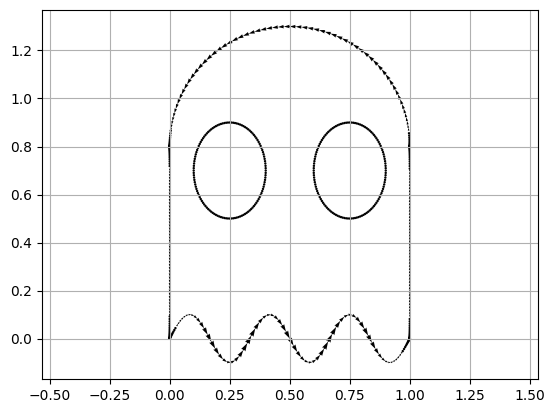

cell object
id: num_edges: 		6
num_holes: 		2
num_pts: 		768
contours: 		[[0, 1, 2, 3], [4], [5]]
hole_int_pts (x): 	[0.75 0.25]
hole_int_pts (y): 	[0.7 0.7]



In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import puncturedfem as pf
import numpy as np

n = 64
q_trap = pf.quad(qtype='trap', n=n)
q_kress = pf.quad(qtype='kress', n=n)

edge_list = []

# bottom: squiggles
e = pf.edge(etype='sine_wave', q=q_kress, amp=0.1, freq=6)
edge_list.append(e)

# right: line
e = pf.edge(etype='line', q=q_kress)
e.join_points([1,0], [1,0.8])
edge_list.append(e)

# top: half-circle
e = pf.edge(etype='circular_arc', q=q_kress, H=0)
e.reflect_across_x_axis()
e.join_points([1,0.8], [0,0.8])
edge_list.append(e)

# left: line
e = pf.edge(etype='line', q=q_kress)
e.join_points([0,0.8], [0,0])
edge_list.append(e)

# right hole
e = pf.edge(etype='ellipse', q=q_trap, a=0.15, b=0.2)
e.translate([0.75,0.7])
e.reverse_orientation()
edge_list.append(e)

# left hole
e = pf.edge(etype='ellipse', q=q_trap, a=0.15, b=0.2)
e.translate([0.25,0.7])
e.reverse_orientation()
edge_list.append(e)

# plot edges
pf.plot_edges(edge_list, orientation=True)

# define mesh cell
K = pf.cell(edge_list)
print(K)

## Define local functions
Consider the functions
\begin{align*}
	v(x) &= \frac{x_1 - 0.25}{(x_1 - 0.25)^2 + (x_2 - 0.7)^2}
	+ x_1^3 x_2 + x_2^2
	~,
	\\[12pt]
	w(x) &= \ln\big[(x_1 - 0.75)^2 + (x_2 - 0.7)^2\big] 
	+ x_1^2 x_2^2 - x_1 x_2^3
	~.
\end{align*}
It holds that 
\begin{align*}
	\Delta v(x) &= 6 x_1 x_2 +2
	~,
	\\[12pt]
	\Delta w(x) &= 2 x_1^2 - 6 x_1 x_2 + 2 x_2^2
	~.
\end{align*}

In [2]:
# get coordinates of boundary points
x1, x2 = K.get_boundary_points()

################################################################################

# trace of v
v_trace = (x1 - 0.25) / ((x1 - 0.25) ** 2 + (x2 - 0.7) ** 2) + \
   (x1 ** 3) * x2 + x2 ** 2

# Laplacian of v
v_laplacian = pf.polynomial([
   [6.0, 1, 1],
   [2.0, 0, 0]
])

# store v as a local function object
v = pf.locfun(v_trace, v_laplacian)

################################################################################

# trace of w
w_trace = np.log((x1 - 0.75) ** 2 + (x2 - 0.7) ** 2) + \
   (x1 ** 2) * (x2 ** 2) - x1 * (x2 ** 3)

# Laplacian of w
w_laplacian = pf.polynomial([
   [2.0, 2, 0],
   [-6.0, 1, 1],
   [2.0, 0, 2]
])

# store w as a local function object
w = pf.locfun(w_trace, w_laplacian)

# compute quanties needed for integration
v.compute_all(K)
w.compute_all(K)

## $H^1$ semi-inner product

Let's compute the $H^1$ semi-inner product 
\begin{align*}
	\int_K \nabla v \cdot \nabla w ~dx
	&\approx
	-6.311053612386
	\pm 3.6161 \times 10^{-12}
\end{align*}
whose approximate value was obtained with *Mathematica*. 

In [3]:
h1_vw_computed = v.compute_h1(w, K)
print('Computed H^1 semi-inner product = ', h1_vw_computed)

h1_vw_exact = -6.311053612386
h1_vw_error = abs(h1_vw_computed - h1_vw_exact)
print('Error in H^1 semi-inner product = %.4e'%(h1_vw_error))

Computed H^1 semi-inner product =  -6.31105361237057
Error in H^1 semi-inner product = 1.5430e-11


Let's do the same for the $L^2$ inner product
\begin{align*}
	\int_K v \, w ~dx
	&\approx -3.277578636852
	\pm 1.0856\times 10^{-13}
\end{align*}

In [4]:
l2_vw_computed = v.compute_l2(w, K)
print('Computed L^2 inner product = ', l2_vw_computed)

l2_vw_exact = -3.277578636852
l2_vw_error = abs(l2_vw_computed - l2_vw_exact)
print('Error in L^2 inner product = %.4e'%l2_vw_error)

Computed L^2 inner product =  -3.277578636805811
Error in L^2 inner product = 4.6189e-11


## Convergence Study

|	n	|	H1 error	|	L2 error	|
|-------|---------------|---------------|
|	4	|	2.4336e+00	|	5.9408e-03	|
|	8	|	1.0269e-02	|	1.3086e-02	|
|	16	|	1.5273e-03	|	1.3783e-04	|
|	32	|	5.3219e-07	|	8.1747e-07	|
|	64	|	1.5430e-11	|	4.6189e-11	|

In [5]:
print('H^1 error (vw) = %.4e'%h1_vw_error)
print('L^2 error (vw) = %.4e'%l2_vw_error)

H^1 error (vw) = 1.5430e-11
L^2 error (vw) = 4.6189e-11


## Interior values

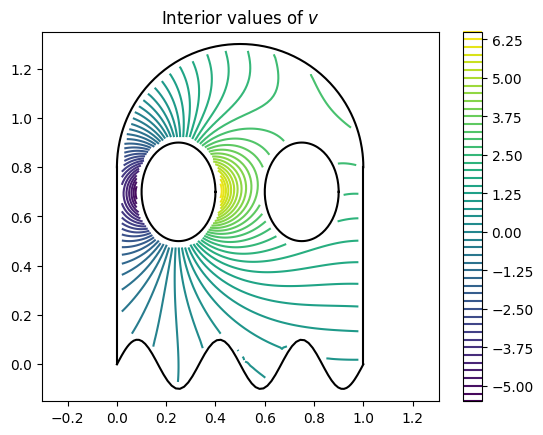

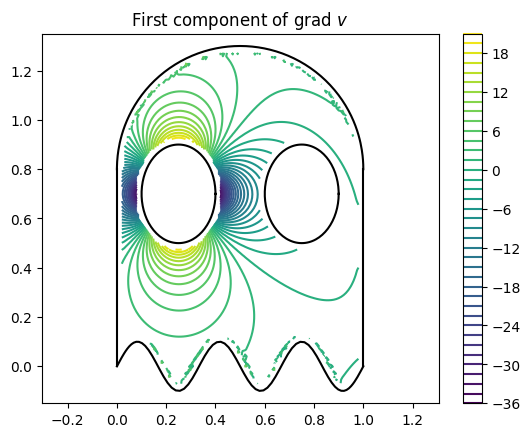

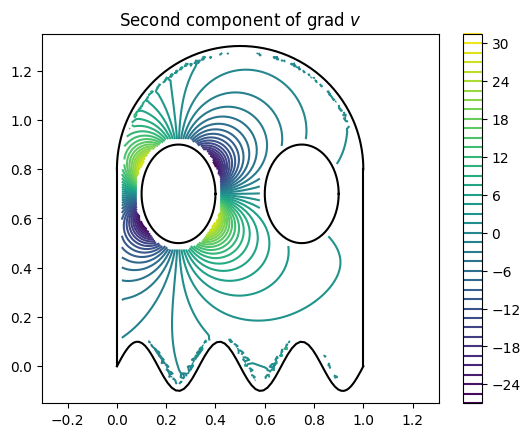

In [6]:
y1, y2, v_computed, v_x1_computed, v_x2_computed = \
    pf.interior_values(v, K)

import matplotlib.pyplot as plt

plt.figure()
for j in range(K.num_edges):
    X = K.edge_list[j].x[0]
    Y = K.edge_list[j].x[1]
    plt.plot(X, Y, 'k')
plt.contour(y1, y2, v_computed, levels=50)
plt.colorbar()
plt.title('Interior values of $v$')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

plt.figure()
for j in range(K.num_edges):
    X = K.edge_list[j].x[0]
    Y = K.edge_list[j].x[1]
    plt.plot(X, Y, 'k')
plt.contour(y1, y2, v_x1_computed, levels=50)
plt.colorbar()
plt.title('First component of grad $v$')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

plt.figure()
for j in range(K.num_edges):
    X = K.edge_list[j].x[0]
    Y = K.edge_list[j].x[1]
    plt.plot(X, Y, 'k')
plt.contour(y1, y2, v_x2_computed, levels=50)
plt.colorbar()
plt.title('Second component of grad $v$')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

plt.show()

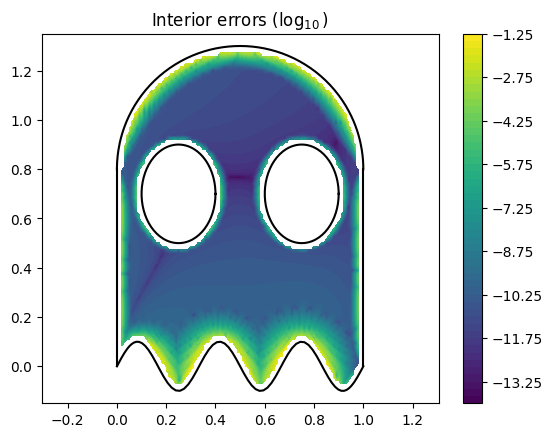

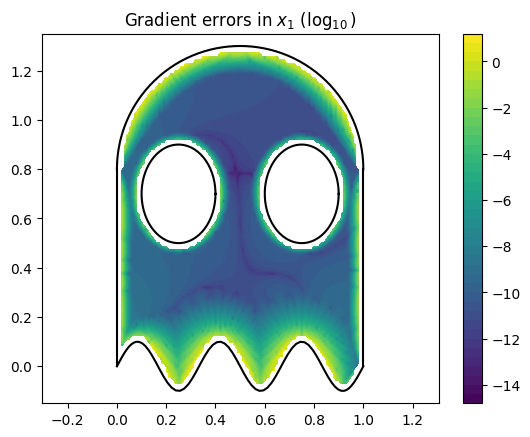

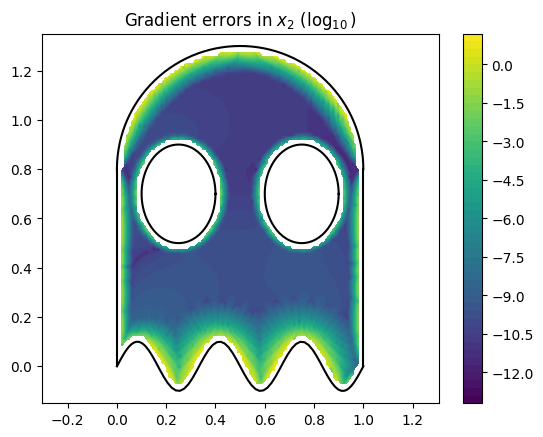

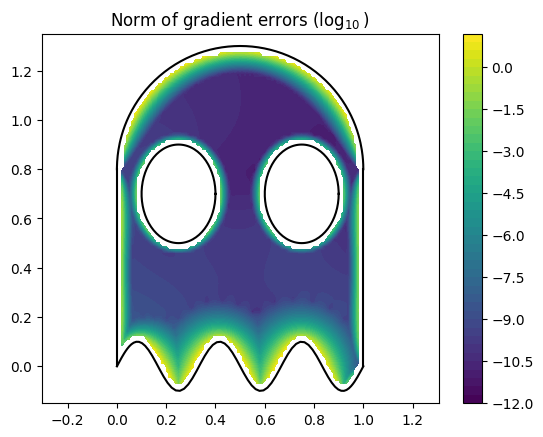

In [7]:
# exact values
v_exact = (y1 - 0.25) / ((y1 - 0.25) ** 2 + (y2 - 0.7) ** 2) + \
   (y1 ** 3) * y2 + y2 ** 2
v_x1_exact = -((y1 - 0.25) ** 2 - (y2 - 0.7) ** 2) / \
    ((y1 - 0.25) ** 2 + (y2 - 0.7) ** 2) ** 2 + \
    3 * (y1 ** 2) * y2
v_x2_exact = -2 * (y1 - 0.25) * (y2 - 0.7) / \
    ((y1 - 0.25) ** 2 + (y2 - 0.7) ** 2) ** 2 + \
    (y1 ** 3) + 2 * y2 

# interior value errors
v_error = np.log10(np.abs(v_computed - v_exact))
plt.figure()
for j in range(K.num_edges):
    plt.plot(K.edge_list[j].x[0], K.edge_list[j].x[1], 'k')
plt.contourf(y1, y2, v_error, levels=50)
plt.colorbar()
plt.title('Interior errors ($\log_{10}$)')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

# first component of gradient errors
v_x1_error = np.log10(np.abs(v_x1_computed - v_x1_exact))
plt.figure()
for j in range(K.num_edges):
    plt.plot(K.edge_list[j].x[0], K.edge_list[j].x[1], 'k')
plt.contourf(y1, y2, v_x1_error, levels=50)
plt.colorbar()
plt.title('Gradient errors in $x_1$ ($\log_{10}$)')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

# second component of gradient errors
v_x2_error = np.log10(np.abs(v_x2_computed - v_x2_exact))
plt.figure()
for j in range(K.num_edges):
    plt.plot(K.edge_list[j].x[0], K.edge_list[j].x[1], 'k')
plt.contourf(y1, y2, v_x2_error, levels=50)
plt.colorbar()
plt.title('Gradient errors in $x_2$ ($\log_{10}$)')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

# norm of gradient errors
v_grad_error = (v_x1_computed - v_x1_exact) ** 2 \
    + (v_x2_computed - v_x2_exact) ** 2
v_grad_error = 0.5 * np.log10(v_grad_error)
plt.figure()
for j in range(K.num_edges):
    plt.plot(K.edge_list[j].x[0], K.edge_list[j].x[1], 'k')
plt.contourf(y1, y2, v_grad_error, levels=50)
plt.colorbar()
plt.title('Norm of gradient errors ($\log_{10}$)')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

plt.show()

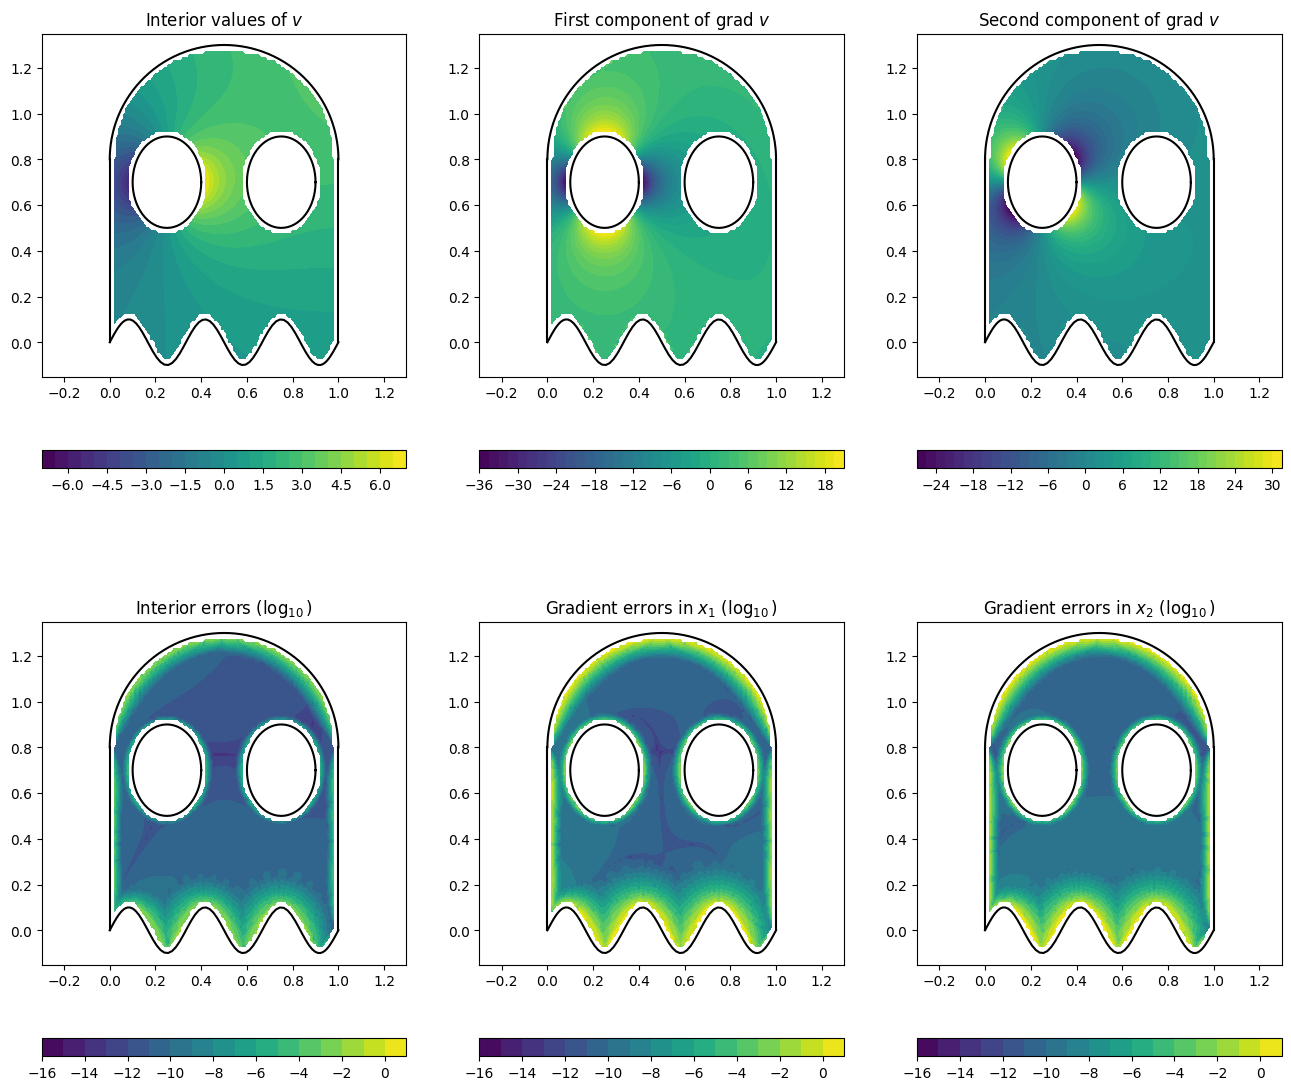

In [8]:
plt.figure(figsize=(16, 14), dpi=100)

plt.subplot(2, 3, 1)
for j in range(K.num_edges):
    X = K.edge_list[j].x[0]
    Y = K.edge_list[j].x[1]
    plt.plot(X, Y, 'k')
plt.contourf(y1, y2, v_computed, levels=np.linspace(-7,7,28+1))
plt.colorbar(location='bottom')
plt.title('Interior values of $v$')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

plt.subplot(2, 3, 2)
for j in range(K.num_edges):
    X = K.edge_list[j].x[0]
    Y = K.edge_list[j].x[1]
    plt.plot(X, Y, 'k')
plt.contourf(y1, y2, v_x1_computed, levels=50)
plt.colorbar(location='bottom')
plt.title('First component of grad $v$')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

plt.subplot(2, 3, 3)
for j in range(K.num_edges):
    X = K.edge_list[j].x[0]
    Y = K.edge_list[j].x[1]
    plt.plot(X, Y, 'k')
plt.contourf(y1, y2, v_x2_computed, levels=50)
plt.colorbar(location='bottom')
plt.title('Second component of grad $v$')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

# interior value errors
plt.subplot(2, 3, 4)
for j in range(K.num_edges):
    plt.plot(K.edge_list[j].x[0], K.edge_list[j].x[1], 'k')
plt.contourf(y1, y2, v_error, levels=np.linspace(-16,1,18))
plt.colorbar(location='bottom')
plt.title('Interior errors ($\log_{10}$)')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

# first component of gradient errors
plt.subplot(2, 3, 5)
for j in range(K.num_edges):
    plt.plot(K.edge_list[j].x[0], K.edge_list[j].x[1], 'k')
plt.contourf(y1, y2, v_x1_error, levels=np.linspace(-16,1,18))
plt.colorbar(location='bottom')
plt.title('Gradient errors in $x_1$ ($\log_{10}$)')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

# second component of gradient errors
plt.subplot(2, 3, 6)
for j in range(K.num_edges):
    plt.plot(K.edge_list[j].x[0], K.edge_list[j].x[1], 'k')
plt.contourf(y1, y2, v_x2_error, levels=np.linspace(-16,1,18))
plt.colorbar(location='bottom')
plt.title('Gradient errors in $x_2$ ($\log_{10}$)')
plt.axis('equal')
plt.ylim([-0.15, 1.35])

# plt.savefig('ghost-fig.pdf', format='pdf', bbox_inches='tight')

plt.show()